In [79]:
import pandas as pd
import numpy as np
import pyarrow as pa
import pyarrow.dataset as pads
import os

pd.set_option('display.max_columns', None)

labeled = pd.read_csv('all_labeled_plays.csv')
labeled

,game_str,play_id,timestamp,player_position,position,play_type,home_team,away_team,top_bottom_inning,pitcher,catcher,first_base,second_base,third_base,shortstop,left_field,center_field,right_field,batter,first_baserunner,second_baserunner,third_baserunner,field_x_7,field_y_7,field_x_8,field_y_8,field_x_9,field_y_9,field_x_10,field_y_10,field_x_11,field_y_11,field_x_12,field_y_12,ball_position_x,ball_position_y,ball_position_z,hist_as,asplus,runner_id,from_base,to_base,attempted,was_safe,runner_x,runner_y,runner_dist_to_base,fielder_x,fielder_y,fielder_dist_to_base,safe_probability,let,cut_hold,cut_relay,optimal_action
0,y1_d001_CGA_QEA,108,4098455,8,center field,ball acquired,QEA,CGA,top,QEA-0404,QEA-0071,QEA-0263,QEA-0365,QEA-0180,QEA-0027,QEA-0249,QEA-0235,QEA-0252,CGA-1824,CGA-1929,CGA-1592,CGA-2010,-110.8791,230.5518,94.4808,338.4810,65.4084,291.4254,35.7615,110.5899,-44.5356,100.8936,-62.0019,65.0769,95.34480,339.4440,0.000000,0.102619,114.200733,10,Home,2B,True,True,35.7615,110.5899,39.346871,94.4808,338.4810,231.626499,0.997925,2.922181,3.253,3.090646,let
1,y1_d001_CGA_QEA,114,4231155,9,right field,ball acquired,QEA,CGA,top,QEA-0404,QEA-0071,QEA-0263,QEA-0365,QEA-0180,QEA-0027,QEA-0249,QEA-0235,QEA-0252,CGA-1353,CGA-1824,CGA-1929,CGA-1592,-121.0008,236.3949,28.4658,327.7230,139.5966,299.0814,61.1802,61.2882,NaN,NaN,NaN,NaN,138.17340,295.9152,5.194530,0.102367,107.931899,10,Home,2B,True,True,61.1802,61.2882,89.783392,139.5966,299.0814,221.583436,0.928294,0.564000,0.564,0.529796,cut_hold
2,y1_d001_CGA_QEA,216,8333280,9,right field,ball acquired,QEA,CGA,top,QEA-0152,QEA-0071,QEA-0263,QEA-0365,QEA-0180,QEA-0027,QEA-0249,QEA-0235,QEA-0252,CGA-1929,CGA-1592,CGA-1547,NaN,-119.2062,233.3106,-29.9289,274.1229,188.1207,245.4093,56.9868,46.3326,NaN,NaN,-50.5641,38.5989,188.00880,246.3627,0.000000,0.102367,107.931899,10,Home,2B,True,True,56.9868,46.3326,98.766010,188.1207,245.4093,222.283963,0.871039,1.563939,1.564,1.502486,cut_hold
3,y1_d002_CGA_QEA,92,3087421,7,left field,ball acquired,QEA,CGA,bottom,CGA-2074,CGA-1127,CGA-1592,CGA-1824,CGA-1198,CGA-2010,CGA-1353,CGA-1458,CGA-1547,QEA-0252,QEA-0235,QEA-0120,NaN,-200.5506,236.1000,-61.6011,276.9882,113.8962,207.5649,57.1884,47.2554,-6.3957,122.2593,-57.1140,67.5888,-201.44550,237.1629,0.000000,0.085549,94.428842,10,Home,2B,True,True,57.1884,47.2554,98.131108,-200.5506,236.1000,228.305395,0.869574,2.242330,2.253,2.067296,cut_relay
4,y1_d003_CGA_QEA,92,3994106,9,right field,ball acquired,QEA,CGA,bottom,CGA-1302,CGA-1503,CGA-1592,CGA-1458,CGA-1166,CGA-2010,CGA-1824,CGA-1547,CGA-1198,QEA-0249,QEA-0365,NaN,NaN,-136.9167,241.8789,51.5217,335.9463,69.6903,327.1002,59.4930,72.1209,NaN,NaN,NaN,NaN,67.77840,325.8180,0.011808,0.094821,99.976237,10,Home,2B,True,True,59.4930,72.1209,80.939068,69.6903,327.1002,211.888716,0.961424,0.564000,0.564,0.545599,cut_hold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529,y2_d094_QZE_RZQ,341,11657364,8,center field,ball acquired,RZQ,QZE,bottom,QZE-2449,QZE-2394,QZE-1252,QZE-1479,QZE-2357,QZE-1245,QZE-2280,QZE-1638,QZE-2217,RZQ-0310,RZQ-0275,RZQ-0231,NaN,-97.8660,261.7449,-2.0037,243.5127,118.4931,246.9180,47.1309,35.7042,1.6380,124.4088,-61.2816,60.3006,-3.23607,247.2696,-0.501801,0.071692,79.783048,12,2B,Home,True,True,-61.2816,60.3006,85.974397,-2.0037,243.5127,243.520943,0.867412,1.666561,1.873,1.751310,let
1530,y2_d094_QZE_RZQ,344,11857564,9,right field,ball acquired,RZQ,QZE,bottom,QZE-2449,QZE-2394,QZE-1252,QZE-1479,QZE-2357,QZE-1245,QZE-2280,QZE-1638,QZE-2217,RZQ-0414,RZQ-0347,RZQ-0310,NaN,-106.7781,143.1831,66.1776,264.8085,233.5866,234.6720,20.2089,125.0232,-60.2076,60.5493,-13.8180,9.9936,233.13270,228.2667,-1.903200,0.063761,67.227633,12,2B,Home,True,True,-13.8180,9.9936,17.053128,233.5866,234.6720,331.109721,1.000000,3.252765,3.253,3.215297,cut_hold
1531,y2_d095_QZE_RZQ

In [80]:
cuts = pd.read_csv('cutoff_decisions.csv')
with_obs = labeled.merge(cuts, on=['game_str', 'play_id'], how='left')
with_obs

,game_str,play_id,timestamp,player_position,position,play_type,home_team,away_team,top_bottom_inning,pitcher,catcher,first_base,second_base,third_base,shortstop,left_field,center_field,right_field,batter,first_baserunner,second_baserunner,third_baserunner,field_x_7,field_y_7,field_x_8,field_y_8,field_x_9,field_y_9,field_x_10,field_y_10,field_x_11,field_y_11,field_x_12,field_y_12,ball_position_x,ball_position_y,ball_position_z,hist_as,asplus,runner_id,from_base,to_base,attempted,was_safe,runner_x,runner_y,runner_dist_to_base,fielder_x,fielder_y,fielder_dist_to_base,safe_probability,let,cut_hold,cut_relay,optimal_action,cutoff_man,cutoff_decision
0,y1_d001_CGA_QEA,108,4098455,8,center field,ball acquired,QEA,CGA,top,QEA-0404,QEA-0071,QEA-0263,QEA-0365,QEA-0180,QEA-0027,QEA-0249,QEA-0235,QEA-0252,CGA-1824,CGA-1929,CGA-1592,CGA-2010,-110.8791,230.5518,94.4808,338.4810,65.4084,291.4254,35.7615,110.5899,-44.5356,100.8936,-62.0019,65.0769,95.34480,339.4440,0.000000,0.102619,114.200733,10,Home,2B,True,True,35.7615,110.5899,39.346871,94.4808,338.4810,231.626499,0.997925,2.922181,3.253,3.090646,let,second baseman,cut and relay to first baseman
1,y1_d001_CGA_QEA,114,4231155,9,right field,ball acquired,QEA,CGA,top,QEA-0404,QEA-0071,QEA-0263,QEA-0365,QEA-0180,QEA-0027,QEA-0249,QEA-0235,QEA-0252,CGA-1353,CGA-1824,CGA-1929,CGA-1592,-121.0008,236.3949,28.4658,327.7230,139.5966,299.0814,61.1802,61.2882,NaN,NaN,NaN,NaN,138.17340,295.9152,5.194530,0.102367,107.931899,10,Home,2B,True,True,61.1802,61.2882,89.783392,139.5966,299.0814,221.583436,0.928294,0.564000,0.564,0.529796,cut_hold,second baseman,cut and hold
2,y1_d001_CGA_QEA,216,8333280,9,right field,ball acquired,QEA,CGA,top,QEA-0152,QEA-0071,QEA-0263,QEA-0365,QEA-0180,QEA-0027,QEA-0249,QEA-0235,QEA-0252,CGA-1929,CGA-1592,CGA-1547,NaN,-119.2062,233.3106,-29.9289,274.1229,188.1207,245.4093,56.9868,46.3326,NaN,NaN,-50.5641,38.5989,188.00880,246.3627,0.000000,0.102367,107.931899,10,Home,2B,True,True,56.9868,46.3326,98.766010,188.1207,245.4093,222.283963,0.871039,1.563939,1.564,1.502486,cut_hold,shortstop,cut and hold
3,y1_d002_CGA_QEA,92,3087421,7,left field,ball acquired,QEA,CGA,bottom,CGA-2074,CGA-1127,CGA-1592,CGA-1824,CGA-1198,CGA-2010,CGA-1353,CGA-1458,CGA-1547,QEA-0252,QEA-0235,QEA-0120,NaN,-200.5506,236.1000,-61.6011,276.9882,113.8962,207.5649,57.1884,47.2554,-6.3957,122.2593,-57.1140,67.5888,-201.44550,237.1629,0.000000,0.085549,94.428842,10,Home,2B,True,True,57.1884,47.2554,98.131108,-200.5506,236.1000,228.305395,0.869574,2.242330,2.253,2.067296,cut_relay,shortstop,cut and relay to third baseman
4,y1_d003_CGA_QEA,92,3994106,9,right field,ball acquired,QEA,CGA,bottom,CGA-1302,CGA-1503,CGA-1592,CGA-1458,CGA-1166,CGA-2010,CGA-1824,CGA-1547,CGA-1198,QEA-0249,QEA-0365,NaN,NaN,-136.9167,241.8789,51.5217,335.9463,69.6903,327.1002,59.4930,72.1209,NaN,NaN,NaN,NaN,67.77840,325.8180,0.011808,0.094821,99.976237,10,Home,2B,True,True,59.4930,72.1209,80.939068,69.6903,327.1002,211.888716,0.961424,0.564000,0.564,0.545599,cut_hold,second baseman,cut and hold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529,y2_d094_QZE_RZQ,341,11657364,8,center field,ball acquired,RZQ,QZE,bottom,QZE-2449,QZE-2394,QZE-1252,QZE-1479,QZE-2357,QZE-1245,QZE-2280,QZE-1638,QZE-2217,RZQ-0310,RZQ-0275,RZQ-0231,NaN,-97.8660,261.7449,-2.0037,243.5127,118.4931,246.9180,47.1309,35.7042,1.6380,124.4088,-61.2816,60.3006,-3.23607,247.2696,-0.501801,0.071692,79.783048,12,2B,Home,True,True,-61.2816,60.3006,85.974397,-2.0037,243.5127,243.520943,0.867412,1.666561,1.873,1.751310,let,pitcher,cut and relay to third baseman
1530,y2_d094_QZE_RZQ,344,11857564,9,right field,ball acquired,RZQ,QZE,bottom,QZE-2449,QZE-2394,QZE-1252,QZE-1479,QZE-2357,QZE-1245,QZE-2280,QZE-1638,QZE-2217,RZQ-0414,RZQ-0347,RZQ-0310,NaN,-106.7781,143.1831,66.1776,264.8085,233.5866,234.6

In [ ]:
def assigned_base(cutoff_man):

    mapping = {
        'first baseman': '1B',
        'second baseman': '2B',
        'third baseman': '3B',
        'shortstop': None,
        'pitcher': None,
        'catcher': 'Home'
    }
    return mapping.get(cutoff_man, None)

mask = (with_obs['cutoff_decision'] == 'cut and hold') & (
    with_obs['to_base'] == with_obs['cutoff_man'].map(assigned_base)
)

with_obs.loc[mask, 'cutoff_decision'] = 'cut and tag'
# Find all (game_str, play_id) where the mask is True
plays_to_update = with_obs.loc[mask, ['game_str', 'play_id']].drop_duplicates()

# Update cutoff_decision for all rows in those plays
for _, row in plays_to_update.iterrows():
    idx = (with_obs['game_str'] == row['game_str']) & (with_obs['play_id'] == row['play_id'])
    with_obs.loc[idx & (with_obs['cutoff_decision'] == 'cut and hold'), 'cutoff_decision'] = 'cut and tag'

with_obs['cutoff_decision'].value_counts()

cutoff_decision
cut and hold                       835
cut and tag                        181
cut and throw to catcher           142
let                                100
cut and relay to third baseman      97
cut and relay to shortstop          67
cut and relay to second baseman     65
cut and relay to first baseman      43
cut and relay to pitcher             4
Name: count, dtype: int64

In [82]:
data_path = "/Users/pranavrajaram/SMT-Data-Challenge-2025"
def readDataSubset(table_type, data_path):
    """
    Loads a specified SMT data subset as a PyArrow dataset.
    """
    valid_tables = ['ball_pos', 'game_events', 'game_info', 'player_pos', 'rosters']
    if table_type not in valid_tables:
        print("Invalid data subset name. Please try again with a valid data subset.")
        return None

    if table_type == 'rosters':
        return pads.dataset(source=os.path.join(data_path, 'rosters.csv'), format='csv')
    else:
        
        return pads.dataset(
            source=os.path.join(data_path, table_type),
            format='csv'
        )

ball_pos_ds = readDataSubset('ball_pos', data_path)
player_pos_ds = readDataSubset('player_pos', data_path)

In [83]:
ball_pos_df = ball_pos_ds.to_table().to_pandas()
player_pos_df = player_pos_ds.to_table().to_pandas()



In [84]:
position_key = pd.DataFrame({
    "cut_code": [*range(1, 14), 255, 14, 15, 16, 17, 18, 19],
    "cut_position": [
        "pitcher", "catcher", "first baseman", "second baseman", "third baseman",
        "shortstop", "left field", "center field", "right field", "batter",
        "runner on first base", "runner on second base", "runner on third base",
        "ball event with no player (e.g., ball bounce)", "home plate umpire",
        "field umpire", "field umpire", "field umpire",
        "first base coach", "third base coach"
    ]
})

player_pos = player_pos_df.merge(
    position_key, left_on='player_position', right_on='cut_code', how='left').drop(
    columns=['player_position'])

player_pos

,game_str,play_id,timestamp,field_x,field_y,cut_code,cut_position
0,y1_d069_ACN_QEA,1,14853,0.6102,58.6314,1,pitcher
1,y1_d069_ACN_QEA,1,14853,1.7643,-6.4374,2,catcher
2,y1_d069_ACN_QEA,1,14853,69.9423,98.1246,3,first baseman
3,y1_d069_ACN_QEA,1,14853,37.2924,146.9091,4,second baseman
4,y1_d069_ACN_QEA,1,14853,-66.9441,86.1147,5,third baseman
...,...,...,...,...,...,...,...
76350334,y1_d058_WZR_YJD,330,12033008,94.1688,194.3637,9,right field
76350335,y1_d058_WZR_YJD,330,12033008,46.8339,87.3768,10,batter
76350336,y1_d058_WZR_YJD,330,12033008,-0.2910,120.6429,11,runner on first base
76350337,y1_d058_WZR_YJD,330,12033008,0.1224,-1.6680,12,runner on second base


In [94]:
everything_df = with_obs.merge(
    player_pos,
    left_on=['game_str', 'play_id', 'timestamp', 'cutoff_man'],
    right_on=['game_str', 'play_id', 'timestamp', 'cut_position'],
    how='left'
).rename(
    columns={
        'field_x': 'cutoff_x', 
        'field_y': 'cutoff_y'
    }
).drop(columns=['cut_position'])

everything_df

,game_str,play_id,timestamp,player_position,position,play_type,home_team,away_team,top_bottom_inning,pitcher,catcher,first_base,second_base,third_base,shortstop,left_field,center_field,right_field,batter,first_baserunner,second_baserunner,third_baserunner,field_x_7,field_y_7,field_x_8,field_y_8,field_x_9,field_y_9,field_x_10,field_y_10,field_x_11,field_y_11,field_x_12,field_y_12,ball_position_x,ball_position_y,ball_position_z,hist_as,asplus,runner_id,from_base,to_base,attempted,was_safe,runner_x,runner_y,runner_dist_to_base,fielder_x,fielder_y,fielder_dist_to_base,safe_probability,let,cut_hold,cut_relay,optimal_action,cutoff_man,cutoff_decision,cutoff_x,cutoff_y,cut_code
0,y1_d001_CGA_QEA,108,4098455,8,center field,ball acquired,QEA,CGA,top,QEA-0404,QEA-0071,QEA-0263,QEA-0365,QEA-0180,QEA-0027,QEA-0249,QEA-0235,QEA-0252,CGA-1824,CGA-1929,CGA-1592,CGA-2010,-110.8791,230.5518,94.4808,338.4810,65.4084,291.4254,35.7615,110.5899,-44.5356,100.8936,-62.0019,65.0769,95.34480,339.4440,0.000000,0.102619,114.200733,10,Home,2B,True,True,35.7615,110.5899,39.346871,94.4808,338.4810,231.626499,0.997925,2.922181,3.253,3.090646,let,second baseman,cut and relay to first baseman,41.7405,194.3859,4
1,y1_d001_CGA_QEA,114,4231155,9,right field,ball acquired,QEA,CGA,top,QEA-0404,QEA-0071,QEA-0263,QEA-0365,QEA-0180,QEA-0027,QEA-0249,QEA-0235,QEA-0252,CGA-1353,CGA-1824,CGA-1929,CGA-1592,-121.0008,236.3949,28.4658,327.7230,139.5966,299.0814,61.1802,61.2882,NaN,NaN,NaN,NaN,138.17340,295.9152,5.194530,0.102367,107.931899,10,Home,2B,True,True,61.1802,61.2882,89.783392,139.5966,299.0814,221.583436,0.928294,0.564000,0.564,0.529796,cut_hold,second baseman,cut and tag,25.8921,137.6235,4
2,y1_d001_CGA_QEA,216,8333280,9,right field,ball acquired,QEA,CGA,top,QEA-0152,QEA-0071,QEA-0263,QEA-0365,QEA-0180,QEA-0027,QEA-0249,QEA-0235,QEA-0252,CGA-1929,CGA-1592,CGA-1547,NaN,-119.2062,233.3106,-29.9289,274.1229,188.1207,245.4093,56.9868,46.3326,NaN,NaN,-50.5641,38.5989,188.00880,246.3627,0.000000,0.102367,107.931899,10,Home,2B,True,True,56.9868,46.3326,98.766010,188.1207,245.4093,222.283963,0.871039,1.563939,1.564,1.502486,cut_hold,shortstop,cut and hold,11.6007,132.4140,6
3,y1_d002_CGA_QEA,92,3087421,7,left field,ball acquired,QEA,CGA,bottom,CGA-2074,CGA-1127,CGA-1592,CGA-1824,CGA-1198,CGA-2010,CGA-1353,CGA-1458,CGA-1547,QEA-0252,QEA-0235,QEA-0120,NaN,-200.5506,236.1000,-61.6011,276.9882,113.8962,207.5649,57.1884,47.2554,-6.3957,122.2593,-57.1140,67.5888,-201.44550,237.1629,0.000000,0.085549,94.428842,10,Home,2B,True,True,57.1884,47.2554,98.131108,-200.5506,236.1000,228.305395,0.869574,2.242330,2.253,2.067296,cut_relay,shortstop,cut and relay to third baseman,-55.6794,140.5182,6
4,y1_d003_CGA_QEA,92,3994106,9,right field,ball acquired,QEA,CGA,bottom,CGA-1302,CGA-1503,CGA-1592,CGA-1458,CGA-1166,CGA-2010,CGA-1824,CGA-1547,CGA-1198,QEA-0249,QEA-0365,NaN,NaN,-136.9167,241.8789,51.5217,335.9463,69.6903,327.1002,59.4930,72.1209,NaN,NaN,NaN,NaN,67.77840,325.8180,0.011808,0.094821,99.976237,10,Home,2B,True,True,59.4930,72.1209,80.939068,69.6903,327.1002,211.888716,0.961424,0.564000,0.564,0.545599,cut_hold,second baseman,cut and tag,18.4110,161.4603,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529,y2_d094_QZE_RZQ,341,11657364,8,center field,ball acquired,RZQ,QZE,bottom,QZE-2449,QZE-2394,QZE-1252,QZE-1479,QZE-2357,QZE-1245,QZE-2280,QZE-1638,QZE-2217,RZQ-0310,RZQ-0275,RZQ-0231,NaN,-97.8660,261.7449,-2.0037,243.5127,118.4931,246.9180,47.1309,35.7042,1.6380,124.4088,-61.2816,60.3006,-3.23607,247.2696,-0.501801,0.071692,79.783048,12,2B,Home,True,True,-61.2816,60.3006,85.974397,-2.0037,243.5127,243.520943,0.867412,1.666561,1.873,1.751310,let,pitcher,cut and relay to third baseman,-2.8077,26.1333,1
1530,y2_d094_QZE_RZQ,344,11857564,9,right field,ball acquired,RZQ,QZE,bottom,QZE-2449,QZ

In [95]:
base_coords = {
    '3B': (-63.64, 63.64),
    'Home': (0, 0),
    '2B': (0, 127)
}

def compute_cutoff_distance(row):
    bx, by = base_coords.get(row['to_base'], (np.nan, np.nan))
    return np.sqrt((row['cutoff_x'] - bx)**2 + (row['cutoff_y'] - by)**2)

everything_df['cutoff_dist_to_base'] = everything_df.apply(compute_cutoff_distance, axis=1)
everything_df

,game_str,play_id,timestamp,player_position,position,play_type,home_team,away_team,top_bottom_inning,pitcher,catcher,first_base,second_base,third_base,shortstop,left_field,center_field,right_field,batter,first_baserunner,second_baserunner,third_baserunner,field_x_7,field_y_7,field_x_8,field_y_8,field_x_9,field_y_9,field_x_10,field_y_10,field_x_11,field_y_11,field_x_12,field_y_12,ball_position_x,ball_position_y,ball_position_z,hist_as,asplus,runner_id,from_base,to_base,attempted,was_safe,runner_x,runner_y,runner_dist_to_base,fielder_x,fielder_y,fielder_dist_to_base,safe_probability,let,cut_hold,cut_relay,optimal_action,cutoff_man,cutoff_decision,cutoff_x,cutoff_y,cut_code,cutoff_dist_to_base
0,y1_d001_CGA_QEA,108,4098455,8,center field,ball acquired,QEA,CGA,top,QEA-0404,QEA-0071,QEA-0263,QEA-0365,QEA-0180,QEA-0027,QEA-0249,QEA-0235,QEA-0252,CGA-1824,CGA-1929,CGA-1592,CGA-2010,-110.8791,230.5518,94.4808,338.4810,65.4084,291.4254,35.7615,110.5899,-44.5356,100.8936,-62.0019,65.0769,95.34480,339.4440,0.000000,0.102619,114.200733,10,Home,2B,True,True,35.7615,110.5899,39.346871,94.4808,338.4810,231.626499,0.997925,2.922181,3.253,3.090646,let,second baseman,cut and relay to first baseman,41.7405,194.3859,4,79.266190
1,y1_d001_CGA_QEA,114,4231155,9,right field,ball acquired,QEA,CGA,top,QEA-0404,QEA-0071,QEA-0263,QEA-0365,QEA-0180,QEA-0027,QEA-0249,QEA-0235,QEA-0252,CGA-1353,CGA-1824,CGA-1929,CGA-1592,-121.0008,236.3949,28.4658,327.7230,139.5966,299.0814,61.1802,61.2882,NaN,NaN,NaN,NaN,138.17340,295.9152,5.194530,0.102367,107.931899,10,Home,2B,True,True,61.1802,61.2882,89.783392,139.5966,299.0814,221.583436,0.928294,0.564000,0.564,0.529796,cut_hold,second baseman,cut and tag,25.8921,137.6235,4,27.986775
2,y1_d001_CGA_QEA,216,8333280,9,right field,ball acquired,QEA,CGA,top,QEA-0152,QEA-0071,QEA-0263,QEA-0365,QEA-0180,QEA-0027,QEA-0249,QEA-0235,QEA-0252,CGA-1929,CGA-1592,CGA-1547,NaN,-119.2062,233.3106,-29.9289,274.1229,188.1207,245.4093,56.9868,46.3326,NaN,NaN,-50.5641,38.5989,188.00880,246.3627,0.000000,0.102367,107.931899,10,Home,2B,True,True,56.9868,46.3326,98.766010,188.1207,245.4093,222.283963,0.871039,1.563939,1.564,1.502486,cut_hold,shortstop,cut and hold,11.6007,132.4140,6,12.801861
3,y1_d002_CGA_QEA,92,3087421,7,left field,ball acquired,QEA,CGA,bottom,CGA-2074,CGA-1127,CGA-1592,CGA-1824,CGA-1198,CGA-2010,CGA-1353,CGA-1458,CGA-1547,QEA-0252,QEA-0235,QEA-0120,NaN,-200.5506,236.1000,-61.6011,276.9882,113.8962,207.5649,57.1884,47.2554,-6.3957,122.2593,-57.1140,67.5888,-201.44550,237.1629,0.000000,0.085549,94.428842,10,Home,2B,True,True,57.1884,47.2554,98.131108,-200.5506,236.1000,228.305395,0.869574,2.242330,2.253,2.067296,cut_relay,shortstop,cut and relay to third baseman,-55.6794,140.5182,6,57.296922
4,y1_d003_CGA_QEA,92,3994106,9,right field,ball acquired,QEA,CGA,bottom,CGA-1302,CGA-1503,CGA-1592,CGA-1458,CGA-1166,CGA-2010,CGA-1824,CGA-1547,CGA-1198,QEA-0249,QEA-0365,NaN,NaN,-136.9167,241.8789,51.5217,335.9463,69.6903,327.1002,59.4930,72.1209,NaN,NaN,NaN,NaN,67.77840,325.8180,0.011808,0.094821,99.976237,10,Home,2B,True,True,59.4930,72.1209,80.939068,69.6903,327.1002,211.888716,0.961424,0.564000,0.564,0.545599,cut_hold,second baseman,cut and tag,18.4110,161.4603,4,39.070157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529,y2_d094_QZE_RZQ,341,11657364,8,center field,ball acquired,RZQ,QZE,bottom,QZE-2449,QZE-2394,QZE-1252,QZE-1479,QZE-2357,QZE-1245,QZE-2280,QZE-1638,QZE-2217,RZQ-0310,RZQ-0275,RZQ-0231,NaN,-97.8660,261.7449,-2.0037,243.5127,118.4931,246.9180,47.1309,35.7042,1.6380,124.4088,-61.2816,60.3006,-3.23607,247.2696,-0.501801,0.071692,79.783048,12,2B,Home,True,True,-61.2816,60.3006,85.974397,-2.0037,243.5127,243.520943,0.867412,1.666561,1.873,1.751310,let,pitcher,cut and relay to third baseman,-2.8077,26.1333,1,26.283694
1530

In [106]:
def get_baserunner_id(row):
    if row['from_base'] == 'Home':
        return row['batter']
    elif row['from_base'] == '1B':
        return row['first_baserunner']
    elif row['from_base'] == '2B':
        return row['second_baserunner']
    else:
        return None

everything_df['baserunner_player_id'] = everything_df.apply(get_baserunner_id, axis=1)
everything_df

,game_str,play_id,timestamp,player_position,position,play_type,home_team,away_team,top_bottom_inning,pitcher,catcher,first_base,second_base,third_base,shortstop,left_field,center_field,right_field,batter,first_baserunner,second_baserunner,third_baserunner,field_x_7,field_y_7,field_x_8,field_y_8,field_x_9,field_y_9,field_x_10,field_y_10,field_x_11,field_y_11,field_x_12,field_y_12,ball_position_x,ball_position_y,ball_position_z,hist_as,asplus,runner_id,from_base,to_base,attempted,was_safe,runner_x,runner_y,runner_dist_to_base,fielder_x,fielder_y,fielder_dist_to_base,safe_probability,let,cut_hold,cut_relay,optimal_action,cutoff_man,cutoff_decision,cutoff_x,cutoff_y,cut_code,cutoff_dist_to_base,baserunner_player_id
0,y1_d001_CGA_QEA,108,4098455,8,center field,ball acquired,QEA,CGA,top,QEA-0404,QEA-0071,QEA-0263,QEA-0365,QEA-0180,QEA-0027,QEA-0249,QEA-0235,QEA-0252,CGA-1824,CGA-1929,CGA-1592,CGA-2010,-110.8791,230.5518,94.4808,338.4810,65.4084,291.4254,35.7615,110.5899,-44.5356,100.8936,-62.0019,65.0769,95.34480,339.4440,0.000000,0.102619,114.200733,10,Home,2B,True,True,35.7615,110.5899,39.346871,94.4808,338.4810,231.626499,0.997925,2.922181,3.253,3.090646,let,second baseman,cut and relay to first baseman,41.7405,194.3859,4,79.266190,CGA-1824
1,y1_d001_CGA_QEA,114,4231155,9,right field,ball acquired,QEA,CGA,top,QEA-0404,QEA-0071,QEA-0263,QEA-0365,QEA-0180,QEA-0027,QEA-0249,QEA-0235,QEA-0252,CGA-1353,CGA-1824,CGA-1929,CGA-1592,-121.0008,236.3949,28.4658,327.7230,139.5966,299.0814,61.1802,61.2882,NaN,NaN,NaN,NaN,138.17340,295.9152,5.194530,0.102367,107.931899,10,Home,2B,True,True,61.1802,61.2882,89.783392,139.5966,299.0814,221.583436,0.928294,0.564000,0.564,0.529796,cut_hold,second baseman,cut and tag,25.8921,137.6235,4,27.986775,CGA-1353
2,y1_d001_CGA_QEA,216,8333280,9,right field,ball acquired,QEA,CGA,top,QEA-0152,QEA-0071,QEA-0263,QEA-0365,QEA-0180,QEA-0027,QEA-0249,QEA-0235,QEA-0252,CGA-1929,CGA-1592,CGA-1547,NaN,-119.2062,233.3106,-29.9289,274.1229,188.1207,245.4093,56.9868,46.3326,NaN,NaN,-50.5641,38.5989,188.00880,246.3627,0.000000,0.102367,107.931899,10,Home,2B,True,True,56.9868,46.3326,98.766010,188.1207,245.4093,222.283963,0.871039,1.563939,1.564,1.502486,cut_hold,shortstop,cut and hold,11.6007,132.4140,6,12.801861,CGA-1929
3,y1_d002_CGA_QEA,92,3087421,7,left field,ball acquired,QEA,CGA,bottom,CGA-2074,CGA-1127,CGA-1592,CGA-1824,CGA-1198,CGA-2010,CGA-1353,CGA-1458,CGA-1547,QEA-0252,QEA-0235,QEA-0120,NaN,-200.5506,236.1000,-61.6011,276.9882,113.8962,207.5649,57.1884,47.2554,-6.3957,122.2593,-57.1140,67.5888,-201.44550,237.1629,0.000000,0.085549,94.428842,10,Home,2B,True,True,57.1884,47.2554,98.131108,-200.5506,236.1000,228.305395,0.869574,2.242330,2.253,2.067296,cut_relay,shortstop,cut and relay to third baseman,-55.6794,140.5182,6,57.296922,QEA-0252
4,y1_d003_CGA_QEA,92,3994106,9,right field,ball acquired,QEA,CGA,bottom,CGA-1302,CGA-1503,CGA-1592,CGA-1458,CGA-1166,CGA-2010,CGA-1824,CGA-1547,CGA-1198,QEA-0249,QEA-0365,NaN,NaN,-136.9167,241.8789,51.5217,335.9463,69.6903,327.1002,59.4930,72.1209,NaN,NaN,NaN,NaN,67.77840,325.8180,0.011808,0.094821,99.976237,10,Home,2B,True,True,59.4930,72.1209,80.939068,69.6903,327.1002,211.888716,0.961424,0.564000,0.564,0.545599,cut_hold,second baseman,cut and tag,18.4110,161.4603,4,39.070157,QEA-0249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529,y2_d094_QZE_RZQ,341,11657364,8,center field,ball acquired,RZQ,QZE,bottom,QZE-2449,QZE-2394,QZE-1252,QZE-1479,QZE-2357,QZE-1245,QZE-2280,QZE-1638,QZE-2217,RZQ-0310,RZQ-0275,RZQ-0231,NaN,-97.8660,261.7449,-2.0037,243.5127,118.4931,246.9180,47.1309,35.7042,1.6380,124.4088,-61.2816,60.3006,-3.23607,247.2696,-0.501801,0.071692,79.783048,12,2B,Home,True,True,-61.2816,60.3006,85.974397,-2.0037,243.5127,243.520943,0.867412,1.666561,1.873,1.751310,let,p

In [116]:
design_matrix = everything_df[['game_str', 'play_id', 'timestamp', 'baserunner_player_id', 'from_base', 'to_base', 'runner_x',
'runner_y', 'runner_dist_to_base', 'cutoff_x', 'cutoff_y', 'cutoff_dist_to_base', 'fielder_x', 'fielder_y',
'fielder_dist_to_base', 'asplus', 'optimal_action', 'cutoff_decision', 'let', 'cut_hold', 'cut_relay', 'safe_probability']]

design_matrix

,game_str,play_id,timestamp,baserunner_player_id,from_base,to_base,runner_x,runner_y,runner_dist_to_base,cutoff_x,cutoff_y,cutoff_dist_to_base,fielder_x,fielder_y,fielder_dist_to_base,asplus,optimal_action,cutoff_decision,let,cut_hold,cut_relay,safe_probability
0,y1_d001_CGA_QEA,108,4098455,CGA-1824,Home,2B,35.7615,110.5899,39.346871,41.7405,194.3859,79.266190,94.4808,338.4810,231.626499,114.200733,let,cut and relay to first baseman,2.922181,3.253,3.090646,0.997925
1,y1_d001_CGA_QEA,114,4231155,CGA-1353,Home,2B,61.1802,61.2882,89.783392,25.8921,137.6235,27.986775,139.5966,299.0814,221.583436,107.931899,cut_hold,cut and tag,0.564000,0.564,0.529796,0.928294
2,y1_d001_CGA_QEA,216,8333280,CGA-1929,Home,2B,56.9868,46.3326,98.766010,11.6007,132.4140,12.801861,188.1207,245.4093,222.283963,107.931899,cut_hold,cut and hold,1.563939,1.564,1.502486,0.871039
3,y1_d002_CGA_QEA,92,3087421,QEA-0252,Home,2B,57.1884,47.2554,98.131108,-55.6794,140.5182,57.296922,-200.5506,236.1000,228.305395,94.428842,cut_relay,cut and relay to third baseman,2.242330,2.253,2.067296,0.869574
4,y1_d003_CGA_QEA,92,3994106,QEA-0249,Home,2B,59.4930,72.1209,80.939068,18.4110,161.4603,39.070157,69.6903,327.1002,211.888716,99.976237,cut_hold,cut and tag,0.564000,0.564,0.545599,0.961424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529,y2_d094_QZE_RZQ,341,11657364,RZQ-0231,2B,Home,-61.2816,60.3006,85.974397,-2.8077,26.1333,26.283694,-2.0037,243.5127,243.520943,79.783048,let,cut and relay to third baseman,1.666561,1.873,1.751310,0.867412
1530,y2_d094_QZE_RZQ,344,11857564,RZQ-0310,2B,Home,-13.8180,9.9936,17.053128,2.4942,88.6911,88.726164,233.5866,234.6720,331.109721,67.227633,cut_hold,cut and hold,3.252765,3.253,3.215297,1.000000
1531,y2_d095_QZE_RZQ,97,2945498,RZQ-0409,2B,Home,-60.0858,78.1305,98.563068,-5.2521,51.3606,51.628440,-100.2816,242.7507,262.648628,121.537404,cut_relay,cut and relay to shortstop,1.711457,1.873,1.438047,0.896247
1532,y2_d095_QZE_RZQ,261,8351098,QZE-2357,2B,Home,-38.8740,30.2727,49.270927,90.5235,113.6388,145.286892,230.5521,250.0368,340.106854,107.228895,cut_hold,cut and hold,2.252998,2.253,2.249481,0.999999


In [108]:
check = design_matrix[(design_matrix['optimal_action'] == 'cut_relay') & (design_matrix['cutoff_decision'] == 'cut and hold')]
check['diff'] = check['cut_hold'] - check['cut_relay']
#check[(check['diff'] < 0.2) & (check['diff'] > 0.1)].sort_values(by='diff', ascending=False)

/var/folders/xm/kp9s55y5457c5q6q9t1jvj140000gn/T/ipykernel_6566/3028667817.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check['diff'] = check['cut_hold'] - check['cut_relay']


In [98]:
# y2_d074.5_VZE_YJD play 76 good example of not aggressive enough 

In [123]:
speeds = pd.read_csv('runner_speeds.csv')
speeds

,player_id,num_appearances,peak_speed_ft_per_s,pct90_speed_ft_per_s
0,IAQ-1783,12,31.181173,30.444060
1,UEX-1111,3,30.814254,29.940639
2,IKJ-2180,9,29.627385,29.361257
3,RZQ-0385,18,30.877511,29.338936
4,XFE-2484,7,31.002160,29.190104
...,...,...,...,...
554,DMS-2354,4,22.086200,20.794230
555,XFE-1704,3,20.604365,20.465668
556,POW-2533,3,21.471650,20.105755
557,KIR-1477,3,18.968475,18.730684


In [126]:
design_full = design_matrix.merge(speeds, left_on = 'baserunner_player_id', right_on='player_id', how='left')

design_full['pct90_speed_ft_per_s'] = design_full['pct90_speed_ft_per_s'].fillna(design_full['pct90_speed_ft_per_s'].mean())

design_full['speed_plus'] = 100 * design_full['pct90_speed_ft_per_s'] / design_full['pct90_speed_ft_per_s'].mean()

design_full


,game_str,play_id,timestamp,baserunner_player_id,from_base,to_base,runner_x,runner_y,runner_dist_to_base,cutoff_x,cutoff_y,cutoff_dist_to_base,fielder_x,fielder_y,fielder_dist_to_base,asplus,optimal_action,cutoff_decision,let,cut_hold,cut_relay,safe_probability,player_id,num_appearances,peak_speed_ft_per_s,pct90_speed_ft_per_s,speed_plus
0,y1_d001_CGA_QEA,108,4098455,CGA-1824,Home,2B,35.7615,110.5899,39.346871,41.7405,194.3859,79.266190,94.4808,338.4810,231.626499,114.200733,let,cut and relay to first baseman,2.922181,3.253,3.090646,0.997925,CGA-1824,7.0,28.322210,27.656672,104.619656
1,y1_d001_CGA_QEA,114,4231155,CGA-1353,Home,2B,61.1802,61.2882,89.783392,25.8921,137.6235,27.986775,139.5966,299.0814,221.583436,107.931899,cut_hold,cut and tag,0.564000,0.564,0.529796,0.928294,CGA-1353,3.0,23.617302,22.445863,84.908207
2,y1_d001_CGA_QEA,216,8333280,CGA-1929,Home,2B,56.9868,46.3326,98.766010,11.6007,132.4140,12.801861,188.1207,245.4093,222.283963,107.931899,cut_hold,cut and hold,1.563939,1.564,1.502486,0.871039,CGA-1929,3.0,28.405855,27.655517,104.615287
3,y1_d002_CGA_QEA,92,3087421,QEA-0252,Home,2B,57.1884,47.2554,98.131108,-55.6794,140.5182,57.296922,-200.5506,236.1000,228.305395,94.428842,cut_relay,cut and relay to third baseman,2.242330,2.253,2.067296,0.869574,QEA-0252,27.0,28.366512,24.333189,92.047583
4,y1_d003_CGA_QEA,92,3994106,QEA-0249,Home,2B,59.4930,72.1209,80.939068,18.4110,161.4603,39.070157,69.6903,327.1002,211.888716,99.976237,cut_hold,cut and tag,0.564000,0.564,0.545599,0.961424,QEA-0249,49.0,27.627580,26.671594,100.893301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529,y2_d094_QZE_RZQ,341,11657364,RZQ-0231,2B,Home,-61.2816,60.3006,85.974397,-2.8077,26.1333,26.283694,-2.0037,243.5127,243.520943,79.783048,let,cut and relay to third baseman,1.666561,1.873,1.751310,0.867412,RZQ-0231,77.0,28.361251,26.829093,101.489089
1530,y2_d094_QZE_RZQ,344,11857564,RZQ-0310,2B,Home,-13.8180,9.9936,17.053128,2.4942,88.6911,88.726164,233.5866,234.6720,331.109721,67.227633,cut_hold,cut and hold,3.252765,3.253,3.215297,1.000000,RZQ-0310,87.0,30.062055,28.691501,108.534205
1531,y2_d095_QZE_RZQ,97,2945498,RZQ-0409,2B,Home,-60.0858,78.1305,98.563068,-5.2521,51.3606,51.628440,-100.2816,242.7507,262.648628,121.537404,cut_relay,cut and relay to shortstop,1.711457,1.873,1.438047,0.896247,RZQ-0409,46.0,29.710083,28.026794,106.019754
1532,y2_d095_QZE_RZQ,261,8351098,QZE-2357,2B,Home,-38.8740,30.2727,49.270927,90.5235,113.6388,145.286892,230.5521,250.0368,340.106854,107.228895,cut_hold,cut and hold,2.252998,2.253,2.249481,0.999999,QZE-2357,12.0,27.535706,27.071918,102.407648


<Axes: title={'center': 'Speed Plus Distribution'}, xlabel='Speed Plus', ylabel='Frequency'>

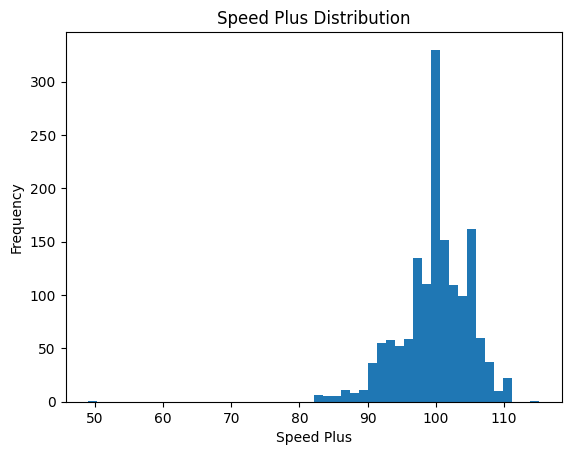

In [127]:
design_full['speed_plus'].plot.hist(bins=50, title='Speed Plus Distribution', xlabel='Speed Plus', ylabel='Frequency')